#Question 1



#Part 1

In [ ]:
import warnings
warnings.simplefilter('ignore')

In [1]:
!pip install mlxtend
!pip install mlxtend --upgrade --no-deps

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 15.7 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [32]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
from sklearn import svm
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report

Training data

In [3]:
df_train = pd.read_csv('/content/drive/MyDrive/Lab_Data/train.csv')
df_train

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [4]:
df_train = df_train.drop('Unnamed: 0',axis=1)
df_train = df_train.drop('id',axis=1)
df_train

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [5]:
df_train.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [6]:
df_train['Arrival Delay in Minutes'] = df_train['Arrival Delay in Minutes'].replace(to_replace = np.nan, value=df_train['Arrival Delay in Minutes'].mean())

In [7]:
df_train.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [8]:
def normalize(df):
  #using The min-max feature scaling for normalizating columns individuallly whose data type is integer
  df2 = df.copy()
  for column in df2.columns:
    if column == 'Age' or column == 'Flight Distance' or column == 'Departure Delay in Minutes' or column == 'Arrival Delay in Minutes':
      df2[column] = (df2[column] - df2[column].mean())/(df2[column].std())
  return df2

df_train = normalize(df_train)
df_train

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,-1.745271,Personal Travel,Eco Plus,-0.731535,3,4,3,1,...,5,4,3,4,4,5,5,0.266391,0.073014,neutral or dissatisfied
1,Male,disloyal Customer,-0.951356,Business travel,Business,-0.957179,3,2,3,3,...,1,1,5,3,1,4,1,-0.361373,-0.237538,neutral or dissatisfied
2,Female,Loyal Customer,-0.885196,Business travel,Business,-0.047584,2,2,2,2,...,5,4,3,4,4,4,5,-0.387530,-0.392814,satisfied
3,Female,Loyal Customer,-0.951356,Business travel,Business,-0.629243,2,5,5,5,...,2,2,5,3,1,4,2,-0.099805,-0.159900,neutral or dissatisfied
4,Male,Loyal Customer,1.430390,Business travel,Business,-0.978239,3,3,3,3,...,3,3,4,4,3,3,3,-0.387530,-0.392814,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,-1.083675,Business travel,Eco,-1.000302,2,1,2,3,...,2,3,1,4,2,3,2,-0.309059,-0.392814,neutral or dissatisfied
103900,Male,Loyal Customer,0.636475,Business travel,Business,1.160863,4,4,4,4,...,5,5,5,5,5,5,4,-0.387530,-0.392814,satisfied
103901,Male,disloyal Customer,-0.620558,Business travel,Business,0.807856,1,1,1,3,...,4,3,2,4,5,5,4,-0.204432,-0.030503,neutral or dissatisfied
103902,Female,disloyal Customer,-1.149834,Business travel,Eco,-0.189990,1,1,1,5,...,1,4,5,1,5,4,1,-0.387530,-0.392814,neutral or dissatisfied


In [9]:
def encode_categorical(df):
  df2 = df.copy()
  for column in df2.columns:
    if df2[column].dtype == object:
      dic = {}
      cnt = 0
      for i in range(len(df2[column])):
        if df2[column][i] not in dic:
          dic[df2[column][i]] = cnt
          cnt+=1

      df2[column] = df2[column].replace(dic)

  return df2

df_train = encode_categorical(df_train)
df_train

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,0,-1.745271,0,0,-0.731535,3,4,3,1,...,5,4,3,4,4,5,5,0.266391,0.073014,0
1,0,1,-0.951356,1,1,-0.957179,3,2,3,3,...,1,1,5,3,1,4,1,-0.361373,-0.237538,0
2,1,0,-0.885196,1,1,-0.047584,2,2,2,2,...,5,4,3,4,4,4,5,-0.387530,-0.392814,1
3,1,0,-0.951356,1,1,-0.629243,2,5,5,5,...,2,2,5,3,1,4,2,-0.099805,-0.159900,0
4,0,0,1.430390,1,1,-0.978239,3,3,3,3,...,3,3,4,4,3,3,3,-0.387530,-0.392814,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,1,1,-1.083675,1,2,-1.000302,2,1,2,3,...,2,3,1,4,2,3,2,-0.309059,-0.392814,0
103900,0,0,0.636475,1,1,1.160863,4,4,4,4,...,5,5,5,5,5,5,4,-0.387530,-0.392814,1
103901,0,1,-0.620558,1,1,0.807856,1,1,1,3,...,4,3,2,4,5,5,4,-0.204432,-0.030503,0
103902,1,1,-1.149834,1,2,-0.189990,1,1,1,5,...,1,4,5,1,5,4,1,-0.387530,-0.392814,0


In [10]:
X_train = df_train.drop('satisfaction',axis=1)
y_train = df_train['satisfaction']

Testing Data

In [11]:
df_test = pd.read_csv('/content/drive/MyDrive/Lab_Data/test.csv')
df_test

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


In [12]:
df_test = df_test.drop('Unnamed: 0',axis=1)
df_test = df_test.drop('id',axis=1)
df_test

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


In [13]:
df_test.isnull().sum()

Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

In [14]:
df_test['Arrival Delay in Minutes'] = df_test['Arrival Delay in Minutes'].replace(to_replace = np.nan, value=df_test['Arrival Delay in Minutes'].mean())

In [15]:
df_test.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [16]:
df_test = normalize(df_test)
df_test

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,0.817871,Business travel,Eco,-1.035151,5,4,3,4,...,5,5,5,5,2,5,5,0.953792,0.781128,satisfied
1,Female,Loyal Customer,-0.239233,Business travel,Business,1.671411,1,1,3,1,...,4,4,4,4,3,4,5,-0.382279,-0.393535,satisfied
2,Male,disloyal Customer,-1.296338,Business travel,Eco,-1.003109,2,0,2,4,...,2,4,1,3,2,2,2,-0.382279,-0.393535,neutral or dissatisfied
3,Male,Loyal Customer,0.289319,Business travel,Business,2.186088,0,0,0,2,...,1,1,1,1,3,1,4,-0.382279,-0.233354,satisfied
4,Female,Loyal Customer,0.619664,Business travel,Eco,-0.011804,2,3,4,3,...,2,2,2,2,4,2,4,-0.382279,0.140403,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,Male,disloyal Customer,-0.371371,Business travel,Business,-0.668668,3,3,3,1,...,4,3,2,4,4,5,4,-0.382279,-0.393535,neutral or dissatisfied
25972,Male,Loyal Customer,-1.098131,Business travel,Business,-0.548510,4,4,4,4,...,4,4,5,5,5,5,4,-0.382279,-0.393535,satisfied
25973,Female,Loyal Customer,-1.494545,Personal Travel,Eco,-0.366270,2,5,1,5,...,2,4,3,4,5,4,2,-0.382279,-0.393535,neutral or dissatisfied
25974,Male,Loyal Customer,-1.692752,Business travel,Business,-0.066876,3,3,3,3,...,4,3,2,5,4,5,4,-0.382279,-0.393535,satisfied


In [17]:
df_test = encode_categorical(df_test)
df_test

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,0,0.817871,0,0,-1.035151,5,4,3,4,...,5,5,5,5,2,5,5,0.953792,0.781128,0
1,0,0,-0.239233,0,1,1.671411,1,1,3,1,...,4,4,4,4,3,4,5,-0.382279,-0.393535,0
2,1,1,-1.296338,0,0,-1.003109,2,0,2,4,...,2,4,1,3,2,2,2,-0.382279,-0.393535,1
3,1,0,0.289319,0,1,2.186088,0,0,0,2,...,1,1,1,1,3,1,4,-0.382279,-0.233354,0
4,0,0,0.619664,0,0,-0.011804,2,3,4,3,...,2,2,2,2,4,2,4,-0.382279,0.140403,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,1,1,-0.371371,0,1,-0.668668,3,3,3,1,...,4,3,2,4,4,5,4,-0.382279,-0.393535,1
25972,1,0,-1.098131,0,1,-0.548510,4,4,4,4,...,4,4,5,5,5,5,4,-0.382279,-0.393535,0
25973,0,0,-1.494545,1,0,-0.366270,2,5,1,5,...,2,4,3,4,5,4,2,-0.382279,-0.393535,1
25974,1,0,-1.692752,0,1,-0.066876,3,3,3,3,...,4,3,2,5,4,5,4,-0.382279,-0.393535,0


In [18]:
X_test = df_test.drop('satisfaction',axis=1)
y_test = df_test['satisfaction']

#Part 2

In [ ]:
dtc = DecisionTreeClassifier(random_state=42)
sfs = SFS(dtc, k_features=10, forward=True, floating=False, scoring='accuracy')
sfs.fit(X_train,y_train)

SequentialFeatureSelector(estimator=DecisionTreeClassifier(random_state=42),
                          k_features=(10, 10), scoring='accuracy')

In [ ]:
X_selected = sfs.transform(X_train)

cv_scores = cross_val_score(dtc, X_selected, y_train, cv=5)
accuracy = cv_scores.mean()

In [ ]:
print("Cross Validation Scores:",cv_scores)

Cross Validation Scores: [0.94971368 0.95033925 0.94899187 0.95178288 0.95076997]


In [ ]:
print('Accuracy for all 10 features:', sfs.k_score_)

Accuracy for all 10 features: 0.9503195300512115


In [ ]:
print('Best 10 features selected by SFS:', sfs.k_feature_names_)

Best 10 features selected by SFS: ('Customer Type', 'Type of Travel', 'Class', 'Inflight wifi service', 'Gate location', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'Baggage handling', 'Inflight service')


#Part 3

In [ ]:
sfs = SFS(dtc, k_features=10, forward=True, floating=False, scoring='accuracy')
sfs.fit(X_train,y_train)
X_selected = sfs.transform(X_train)
cv_scores = cross_val_score(dtc, X_selected, y_train, cv=4)
print("Cross Validation Scores:",cv_scores)
print('Accuracy for all 10 features:', sfs.k_score_)
print('Best 10 features selected by SFS:', sfs.k_feature_names_)

Cross Validation Scores: [0.94833693 0.94953034 0.94929935 0.95072374]
Accuracy for all 10 features: 0.9503195300512115
Best 10 features selected by SFS: ('Customer Type', 'Type of Travel', 'Class', 'Inflight wifi service', 'Gate location', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'Baggage handling', 'Inflight service')


In [ ]:
sbs = SFS(dtc, k_features=10, forward=False, floating=False, scoring='accuracy')
sbs.fit(X_train,y_train)
X_selected_sbs = sbs.transform(X_train)
cv_scores_sbs = cross_val_score(dtc, X_selected_sbs, y_train, cv=4)
print("Cross Validation Scores:",cv_scores_sbs)
print('Accuracy for all 10 features:', sbs.k_score_)
print('Best 10 features selected by SFS:', sbs.k_feature_names_)

Cross Validation Scores: [0.94833693 0.94953034 0.94929935 0.95072374]
Accuracy for all 10 features: 0.9503195300512115
Best 10 features selected by SFS: ('Customer Type', 'Type of Travel', 'Class', 'Inflight wifi service', 'Gate location', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'Baggage handling', 'Inflight service')


In [ ]:
sffs = SFS(dtc, k_features=10, forward=True, floating=True, scoring='accuracy')
sffs.fit(X_train,y_train)
X_selected_sffs = sffs.transform(X_train)
cv_scores_sffs = cross_val_score(dtc, X_selected_sffs, y_train, cv=4)
print("Cross Validation Scores:",cv_scores_sffs)
print('Accuracy for all 10 features:', sffs.k_score_)
print('Best 10 features selected by SFS:', sffs.k_feature_names_)

Cross Validation Scores: [0.94833693 0.94953034 0.94929935 0.95072374]
Accuracy for all 10 features: 0.9503195300512115
Best 10 features selected by SFS: ('Customer Type', 'Type of Travel', 'Class', 'Inflight wifi service', 'Gate location', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'Baggage handling', 'Inflight service')


In [ ]:
sbfs = SFS(dtc, k_features=10, forward=False, floating=True, scoring='accuracy')
sbfs.fit(X_train,y_train)
X_selected_sbfs = sbfs.transform(X_train)
cv_scores_sbfs = cross_val_score(dtc, X_selected_sbfs, y_train, cv=4)
print("Cross Validation Scores:",cv_scores_sbfs)
print('Accuracy for all 10 features:', sbfs.k_score_)
print('Best 10 features selected by SFS:', sbfs.k_feature_names_)

Cross Validation Scores: [0.95045427 0.95083924 0.9499923  0.95234062]
Accuracy for all 10 features: 0.9517150522343117
Best 10 features selected by SFS: ('Customer Type', 'Type of Travel', 'Class', 'Inflight wifi service', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'Baggage handling', 'Inflight service', 'Cleanliness')


#Part 4

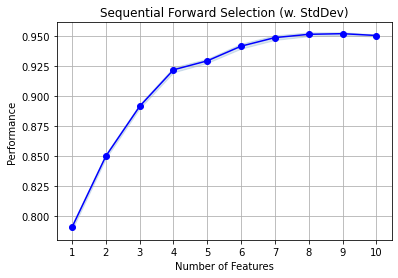

In [ ]:
results_df = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
fig = plot_sfs(sfs.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

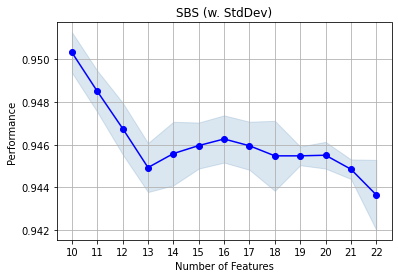

In [ ]:
results_df = pd.DataFrame.from_dict(sbs.get_metric_dict()).T
fig = plot_sfs(sbs.get_metric_dict(), kind='std_dev')
plt.title('SBS (w. StdDev)')
plt.grid()
plt.show()

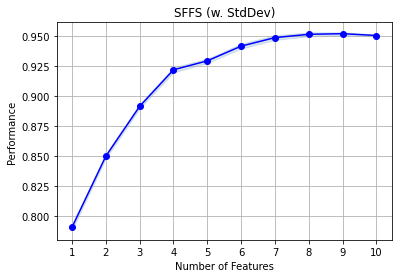

In [ ]:
results_df = pd.DataFrame.from_dict(sffs.get_metric_dict()).T
fig = plot_sfs(sffs.get_metric_dict(), kind='std_dev')
plt.title('SFFS (w. StdDev)')
plt.grid()
plt.show()

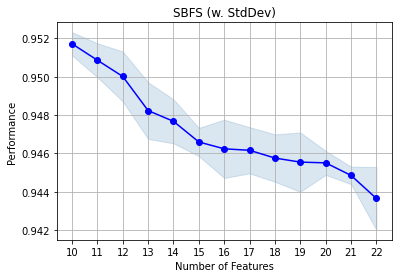

In [ ]:
results_df = pd.DataFrame.from_dict(sbfs.get_metric_dict()).T
fig = plot_sfs(sbfs.get_metric_dict(), kind='std_dev')
plt.title('SBFS (w. StdDev)')
plt.grid()
plt.show()

#Part 5 & 6

In [19]:
#UnderSampling data set for faster operations
df_train_under = df_train.sample(1000)

In [20]:
def bidirectional_feature_set_generation(X_train,y_train,n_features,model,*,scoring='accuracy'):
  sfs = SFS(model, k_features=n_features, forward=True, floating=False, scoring=scoring)
  sfs.fit(X_train,y_train)
  sbs = SFS(model, k_features=n_features, forward=False, floating=False, scoring=scoring)
  sbs.fit(X_train,y_train)
  sfs_feats = sfs.k_feature_names_
  sbs_feats = sbs.k_feature_names_
  feats = []
  for x in list(sfs_feats):
    if x in list(sbs_feats):
      feats.append(x)

  return feats

In [21]:
X_train_under = df_train_under.drop('satisfaction',axis=1)
y_train_under = df_train_under['satisfaction']

In [22]:
#Decision Tree
model = DecisionTreeClassifier(random_state=2)
n_features = 14
feats = bidirectional_feature_set_generation(X_train_under, y_train_under,n_features,model)
feats

['Customer Type',
 'Age',
 'Type of Travel',
 'Class',
 'Inflight wifi service',
 'Ease of Online booking',
 'Gate location',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'Baggage handling',
 'Cleanliness']

In [23]:
#SVM
model2 = svm.SVC(random_state=42)
n_features2 = 14
feats2 = bidirectional_feature_set_generation(X_train_under, y_train_under,n_features2,model2)

In [24]:
feats2

['Gender',
 'Customer Type',
 'Type of Travel',
 'Class',
 'Inflight wifi service',
 'Departure/Arrival time convenient',
 'Online boarding',
 'On-board service',
 'Baggage handling',
 'Checkin service',
 'Cleanliness']

In [25]:
#information_gain
model3 = DecisionTreeClassifier(random_state=2)
n_features3 = 14
feats3 = bidirectional_feature_set_generation(X_train_under, y_train_under,n_features3,model3,scoring='mutual_info_score')
feats3

['Customer Type',
 'Age',
 'Type of Travel',
 'Class',
 'Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Online boarding',
 'Inflight entertainment',
 'Baggage handling',
 'Cleanliness']

In [28]:
#Distance Measure
model4 = KMeans(n_clusters=2, random_state=0, n_init="auto")
n_features4 = 14
feats4 = bidirectional_feature_set_generation(X_train_under, y_train_under,n_features4,model4)
feats4

['Age',
 'Flight Distance',
 'Online boarding',
 'Inflight entertainment',
 'Leg room service',
 'Checkin service',
 'Inflight service',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes']

In [31]:
#Distance Measures (Separability)
model5 = LinearDiscriminantAnalysis()
n_features5 = 14
feats5 = bidirectional_feature_set_generation(X_train_under, y_train_under,n_features5,model5)
feats5

['Customer Type',
 'Age',
 'Type of Travel',
 'Flight Distance',
 'Inflight wifi service',
 'Ease of Online booking',
 'Online boarding',
 'Leg room service']

#Part 7

In [33]:
df_test_under = df_test.sample(1000)

In [34]:
X_test_under = df_test_under.drop('satisfaction',axis=1)
y_test_under = df_test_under['satisfaction']

In [36]:
dtc1 = DecisionTreeClassifier(random_state=42)
dtc1.fit(X_train_under.loc[:,feats],y_train_under)
y_pred = dtc1.predict(X_test_under.loc[:,feats])
print(classification_report(y_test_under, y_pred, target_names=['0 : satisfied','1 : neutral or not satisfied']))

                              precision    recall  f1-score   support

               0 : satisfied       0.40      0.60      0.48       453
1 : neutral or not satisfied       0.44      0.26      0.33       547

                    accuracy                           0.42      1000
                   macro avg       0.42      0.43      0.41      1000
                weighted avg       0.42      0.42      0.40      1000



In [37]:
dtc2 = DecisionTreeClassifier(random_state=42)
dtc2.fit(X_train_under.loc[:,feats2],y_train_under)
y_pred2 = dtc2.predict(X_test_under.loc[:,feats2])
print(classification_report(y_test_under, y_pred2, target_names=['0 : satisfied','1 : neutral or not satisfied']))

                              precision    recall  f1-score   support

               0 : satisfied       0.43      0.62      0.51       453
1 : neutral or not satisfied       0.50      0.32      0.39       547

                    accuracy                           0.46      1000
                   macro avg       0.47      0.47      0.45      1000
                weighted avg       0.47      0.46      0.44      1000



In [38]:
dtc3 = DecisionTreeClassifier(random_state=42)
dtc3.fit(X_train_under.loc[:,feats3],y_train_under)
y_pred3 = dtc3.predict(X_test_under.loc[:,feats3])
print(classification_report(y_test_under, y_pred3, target_names=['0 : satisfied','1 : neutral or not satisfied']))

                              precision    recall  f1-score   support

               0 : satisfied       0.40      0.60      0.48       453
1 : neutral or not satisfied       0.44      0.26      0.33       547

                    accuracy                           0.41      1000
                   macro avg       0.42      0.43      0.40      1000
                weighted avg       0.42      0.41      0.40      1000



In [39]:
dtc4 = DecisionTreeClassifier(random_state=42)
dtc4.fit(X_train_under.loc[:,feats4],y_train_under)
y_pred4 = dtc4.predict(X_test_under.loc[:,feats4])
print(classification_report(y_test_under, y_pred4, target_names=['0 : satisfied','1 : neutral or not satisfied']))

                              precision    recall  f1-score   support

               0 : satisfied       0.22      0.28      0.24       453
1 : neutral or not satisfied       0.24      0.19      0.21       547

                    accuracy                           0.23      1000
                   macro avg       0.23      0.23      0.23      1000
                weighted avg       0.23      0.23      0.23      1000



In [40]:
dtc5 = DecisionTreeClassifier(random_state=42)
dtc5.fit(X_train_under.loc[:,feats5],y_train_under)
y_pred5 = dtc5.predict(X_test_under.loc[:,feats5])
print(classification_report(y_test_under, y_pred5, target_names=['0 : satisfied','1 : neutral or not satisfied']))

                              precision    recall  f1-score   support

               0 : satisfied       0.39      0.63      0.48       453
1 : neutral or not satisfied       0.37      0.18      0.24       547

                    accuracy                           0.38      1000
                   macro avg       0.38      0.40      0.36      1000
                weighted avg       0.38      0.38      0.35      1000



#Question 2

#Part 1

In [ ]:
np.random.seed(42)
cov_mat = np.matrix([[0.6006771,0.14889879,0.244939],[0.14889879,0.58982531,0.2415981],[0.244939,0.24154981,0.48778655]])
X = np.random.multivariate_normal(mean=[0, 0, 0], cov=cov_mat, size=1000)
y = []
v = np.matrix([[1/np.sqrt(6)],[1/np.sqrt(6)],[-2/np.sqrt(6)]])
for x in X:
  if np.dot(x,v)>0:
    y.append(0)
  else:
    y.append(1)

y = np.array(y)
y = y.reshape(X.shape[0],1)
df = np.concatenate((X,y),axis=1)

<ipython-input-33-c12a77309bf6>:3: RuntimeWarning: covariance is not positive-semidefinite.
  X = np.random.multivariate_normal(mean=[0, 0, 0], cov=cov_mat, size=1000)


In [ ]:
df = pd.DataFrame(df,columns = ['X1','X2','X3','Class'])
df

,X1,X2,X3,Class
0,-0.483747,-0.348231,-0.014580,1.0
1,-0.951909,-0.706603,-0.955632,0.0
2,-0.467357,-1.166434,-1.091146,0.0
3,-0.441442,0.006498,-0.494285,0.0
4,-0.696265,1.121942,-0.829539,0.0
...,...,...,...,...
995,0.483872,0.584824,0.582150,1.0
996,1.490117,-0.811570,1.242853,1.0
997,-0.275181,-0.333216,-0.428022,0.0
998,0.540418,0.451703,0.643433,1.0


In [ ]:
fig = px.scatter_3d(df,x = 'X1', 
                    y = 'X2', 
                    z = 'X3',
                    color = 'Class')
fig.show()

#Part 2

In [ ]:
X = df.drop('Class',axis=1)
y = df['Class']

In [ ]:
principal=PCA(n_components=3)
principal.fit(X)
X_pca = principal.transform(X)
X_pca.shape

(1000, 3)

In [ ]:
X_pca = pd.DataFrame(X_pca,columns=['X1','X2','X3'])
X_pca

,X1,X2,X3
0,0.438013,-0.044381,0.309195
1,1.464412,-0.064171,-0.114239
2,1.478713,0.600353,-0.265245
3,0.506053,-0.286000,-0.233695
4,0.280894,-1.302486,-0.814733
...,...,...,...
995,-0.999591,-0.142131,0.014735
996,-1.288145,1.570127,0.634319
997,0.539948,0.080740,-0.125102
998,-1.001450,-0.004175,0.089831


#Part 3

In [ ]:
X_sub1 = X_pca.drop('X3',axis=1)
X_sub2 = X_pca.drop('X1',axis=1)
X_sub3 = X_pca.drop('X2',axis=1)

In [ ]:
def plot_db(clf,X,Y,cmap = 'Paired_r'):
  h = 0.01
  x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
  y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h

  xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
  z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
  z = z.reshape(xx.shape)

  plt.figure(figsize = (5,5))
  plt.contourf(xx,yy,z,cmap=cmap,alpha = 0.5)
  plt.contour(xx,yy,z,colors = 'k',linewidths = 0.5)
  plt.scatter(X[:,0],X[:,1],c = Y , cmap = cmap , edgecolors = 'k')

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



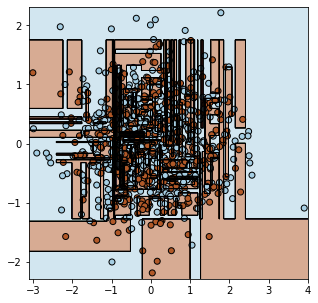

In [ ]:
dtc_sub1 = DecisionTreeClassifier(random_state=42)
dtc_sub1.fit(X_sub1,y)
plot_db(dtc_sub1,X_sub1.to_numpy(),y)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



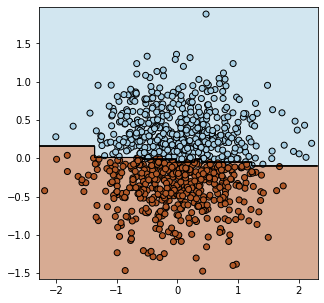

In [ ]:
dtc_sub2 = DecisionTreeClassifier(random_state=42)
dtc_sub2.fit(X_sub2,y)
plot_db(dtc_sub2,X_sub2.to_numpy(),y)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



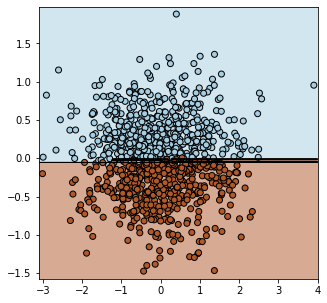

In [ ]:
dtc_sub3 = DecisionTreeClassifier(random_state=42)
dtc_sub3.fit(X_sub3,y)
plot_db(dtc_sub3,X_sub3.to_numpy(),y)

#Part 4

In [ ]:
principal=PCA(n_components=2)
principal.fit(X)
X_pca2 = principal.transform(X)
X_pca2.shape

(1000, 2)

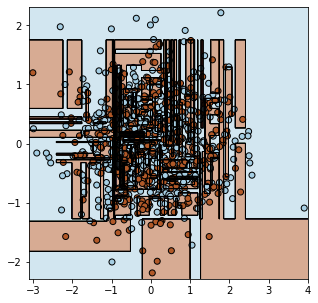

In [ ]:
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_pca2,y)
plot_db(dtc,X_pca2,y)